In [1]:
import re 
from konlpy.tag import Mecab 
import tensorflow as tf 
tf.random.set_seed(0) 
mecab = Mecab(dicpath="C:\mecab\mecab-ko-dic")

with open('wiki_space_tokenizer.txt', mode='r', encoding='utf-8') as f: 
    wiki_contents = f.read()
wiki_contents = wiki_contents.split("\n")

In [2]:
len(wiki_contents)

1806748

In [3]:
wiki_contents = wiki_contents[:1000]

In [4]:
text = list() 
maxlen = 8
tmp_content = list()
for content in wiki_contents: 
    content = content.strip()
    content = re.sub(r'\([^)]*\)', '', content)
    content = content.lower()
    if not content: continue 
    if content[-1] == '.':
        if len(tmp_content) > 0: 
            tmp_content = tmp_content + ['\n'] + mecab.morphs(content)
        else: tmp_content = mecab.morphs(content) 
    else:
        if len(tmp_content) > maxlen: 
            text.append(tmp_content+['E']) 
        tmp_content = list()    

In [5]:
len(text), text[:2]

(110,
 [['제임스',
   '얼',
   '"',
   '지미',
   '"',
   '카터',
   '주니어',
   '는',
   '민주당',
   '출신',
   '미국',
   '39',
   '번',
   '째',
   '대통령',
   '이',
   '다',
   '.',
   '\n',
   '지미',
   '카터',
   '는',
   '조지아',
   '주',
   '섬터',
   '카운티',
   '플',
   '레인스',
   '마을',
   '에서',
   '태어났',
   '다',
   '.',
   '조지',
   '아',
   '공과',
   '대학교',
   '를',
   '졸업',
   '하',
   '였',
   '다',
   '.',
   '그',
   '후',
   '해군',
   '에',
   '들어가',
   '전함',
   '·',
   '원자력',
   '·',
   '잠수함',
   '의',
   '승무원',
   '으로',
   '일',
   '하',
   '였',
   '다',
   '.',
   '1953',
   '년',
   '미국',
   '해군',
   '대위',
   '로',
   '예편',
   '하',
   '였',
   '고',
   '이후',
   '땅콩',
   '·',
   '면화',
   '등',
   '을',
   '가꿔',
   '많',
   '은',
   '돈',
   '을',
   '벌',
   '었',
   '다',
   '.',
   '그',
   '의',
   '별명',
   '이',
   '"',
   '땅콩',
   '농부',
   '"',
   '로',
   '알려졌',
   '다',
   '.',
   '\n',
   '1962',
   '년',
   '조지아',
   '주',
   '상원',
   '의원',
   '선거',
   '에서',
   '낙선',
   '하',
   '나',
   '그',
   '선거',
   '가',
   '부정',
   '선거',
 

In [6]:
total_text = list() 
for elem in text: total_text += elem
len(total_text)

69130

In [7]:
words = sorted(list(set(total_text)))
word_size = len(words)
word_indices = dict((c, i) for i, c in enumerate(words))
indices_word = dict((i, c) for i, c in enumerate(words))
print('total words: ', word_size)

total words:  7745


In [8]:
sentences = []
next_words = []
for content in text: 
    for i in range(0, len(content) - maxlen, 1):
        sentences.append([word_indices[elem] for elem in content[i: i + maxlen]])
        next_words.append(word_indices[content[i + maxlen]])
print("sequences length: ", len(sentences))

sequences length:  68250


In [9]:
from tensorflow.keras.utils import to_categorical 
import numpy as np
data_X = np.array(sentences) 
data_Y = np.array(next_words) 
data_Y = to_categorical(data_Y)
y_size = data_Y.shape[1]

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(input_dim=word_size, 
                   output_dim=200, 
                   input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(y_size, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
import time 
start_time = time.time() 

history = model.fit(data_X, data_Y,
          batch_size=256,
          epochs=150, 
          verbose=2)

end_time = time.time() 

Train on 68250 samples
Epoch 1/150
68250/68250 - 10s - loss: 6.9930 - accuracy: 0.0328
Epoch 2/150
68250/68250 - 8s - loss: 6.3451 - accuracy: 0.0491
Epoch 3/150
68250/68250 - 8s - loss: 6.1494 - accuracy: 0.0720
Epoch 4/150
68250/68250 - 8s - loss: 5.9838 - accuracy: 0.0898
Epoch 5/150
68250/68250 - 8s - loss: 5.7816 - accuracy: 0.1286
Epoch 6/150
68250/68250 - 8s - loss: 5.5897 - accuracy: 0.1639
Epoch 7/150
68250/68250 - 8s - loss: 5.4168 - accuracy: 0.1859
Epoch 8/150
68250/68250 - 8s - loss: 5.2532 - accuracy: 0.2044
Epoch 9/150
68250/68250 - 8s - loss: 5.0955 - accuracy: 0.2217
Epoch 10/150
68250/68250 - 8s - loss: 4.9528 - accuracy: 0.2350
Epoch 11/150
68250/68250 - 8s - loss: 4.8237 - accuracy: 0.2445
Epoch 12/150
68250/68250 - 9s - loss: 4.7065 - accuracy: 0.2547
Epoch 13/150
68250/68250 - 9s - loss: 4.5990 - accuracy: 0.2645
Epoch 14/150
68250/68250 - 9s - loss: 4.4960 - accuracy: 0.2748
Epoch 15/150
68250/68250 - 9s - loss: 4.3992 - accuracy: 0.2841
Epoch 16/150
68250/68250 

Epoch 129/150
68250/68250 - 11s - loss: 0.5779 - accuracy: 0.8916
Epoch 130/150
68250/68250 - 11s - loss: 0.5690 - accuracy: 0.8935
Epoch 131/150
68250/68250 - 10s - loss: 0.5616 - accuracy: 0.8948
Epoch 132/150
68250/68250 - 9s - loss: 0.5520 - accuracy: 0.8974
Epoch 133/150
68250/68250 - 9s - loss: 0.5424 - accuracy: 0.8984
Epoch 134/150
68250/68250 - 9s - loss: 0.5328 - accuracy: 0.9010
Epoch 135/150
68250/68250 - 9s - loss: 0.5278 - accuracy: 0.9022
Epoch 136/150
68250/68250 - 10s - loss: 0.5184 - accuracy: 0.9036
Epoch 137/150
68250/68250 - 9s - loss: 0.5119 - accuracy: 0.9053
Epoch 138/150
68250/68250 - 9s - loss: 0.5122 - accuracy: 0.9043
Epoch 139/150
68250/68250 - 10s - loss: 0.4999 - accuracy: 0.9074
Epoch 140/150
68250/68250 - 9s - loss: 0.4915 - accuracy: 0.9092
Epoch 141/150
68250/68250 - 10s - loss: 0.4838 - accuracy: 0.9112
Epoch 142/150
68250/68250 - 9s - loss: 0.4816 - accuracy: 0.9107
Epoch 143/150
68250/68250 - 8s - loss: 0.4709 - accuracy: 0.9129
Epoch 144/150
68250

In [13]:
"Time: {}".format(end_time-start_time)

'Time: 1332.0519800186157'

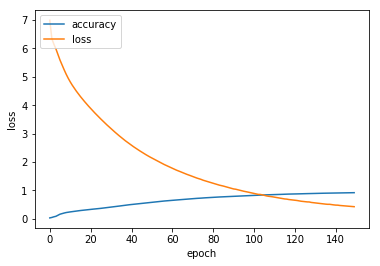

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [15]:
import sys
from nltk.translate import bleu_score

def text_generation(model):
    text_idx = 0
    current_text = text[text_idx]
    sentence = current_text[:maxlen]
    generated = ' '.join(sentence)
    print('----- Generating with seed: "' + ' '.join(sentence) + '"')
    sys.stdout.write(generated)

    for i in range(200): 
        x_pred = list()
        for word in sentence: 
            x_pred.append([word_indices[word]])

        x_pred = np.asarray(x_pred)
        preds = model.predict(x_pred.T)[0] 
        next_idx = np.argmax(preds)
        next_word = indices_word[next_idx]
        sentence = sentence[1:] + [next_word]
        sys.stdout.write(' ' + next_word)
        sys.stdout.flush()
        if next_word == 'E': break 
    print()

def text_generation_res(model):
    text_idx = 0
    current_text = text[text_idx]
    generated = list()
    sentence = current_text[:maxlen]
    generated += sentence
    
    for i in range(min(200, len(current_text))): 
        x_pred = list()
        for word in sentence: 
            x_pred.append([word_indices[word]])

        x_pred = np.asarray(x_pred)
        preds = model.predict(x_pred.T)[0] 
        next_idx = np.argmax(preds)
        next_word = indices_word[next_idx]
        sentence = sentence[1:] + [next_word]
        generated += [next_word]
        if next_word == 'E': break
        
    return generated, text_idx

def get_BLEU_score(model): 
    predict_text, text_idx = text_generation_res(model) 
    pred_len = len(predict_text) 
    original_text = text[text_idx] 
    original_text = original_text[:pred_len]
    BLEUscore = bleu_score.sentence_bleu([original_text], predict_text)
    return BLEUscore

In [16]:
text_generation(model)

----- Generating with seed: "제임스 얼 " 지미 " 카터 주니어 는"
제임스 얼 " 지미 " 카터 주니어 는 민주당 출신 미국 39 번 째 대통령 이 다 . 
 지미 카터 는 현재 의 우크라 이나 건축 과 함께 , 화이트칼라 직종 , 히라가나 나 집단 으로 대별 하 기 도 했 다 . 또한 노무현 은 노무현 대선 당시 미국 측 의 자택 에서 이 다 . 
 일반 화 기준 에 있 어서 도 연구 하 는 사람 이 다 . 
 일반 적 인 환 위 의 분야 에 포함 된다 . 
 화학 의 중요 한 법칙 을 이용 한 방법 으로 다음 과 같이 주어진다 은 연속 분포 의 효과 로 여러분 을 받 았 다고 됐 다 . 그 의 탈당 은 노무현 에게 악재 가 되 지 않 겠 느냐는 관측 이 있 었 으나 , 답보 상태 였 던 그 의 지지율 은 20 % 대 를 회복 하 고 후원금 액수 도 크 게 늘 었 다 . 
 2009 년 4 월 에 는 한미 fta 추진 이 대통령 으로 주어진다 . 
 만약 살 겠 다 . 또한 유리수 의 지지율 에 대해 깊 게 비난 내용 에 입당 하 였 다 . 
 1996 년 4 월 11 일 에 시행 된 2002 년 3 월


In [17]:
get_BLEU_score(model)

0.17523769053944854

In [18]:
from rouge import Rouge

evalutaor = Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                           max_n=4,
                           apply_avg='Avg',
                           alpha=0.5,
                           weight_factor=1.2)

In [19]:
def get_ROUGE_score(model, evaluator): 
    predict_text, text_idx = text_generation_res(model) 
    pred_len = len(predict_text) 
    predict_text = ' '.join(predict_text)
    original_text = text[text_idx] 
    original_text = ' '.join(original_text)
    score = evalutaor.get_scores(original_text, predict_text)
    return score
get_ROUGE_score(model, evalutaor)

{'rouge-4': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-1': {'f': 0.11111111111111112, 'p': 0.125, 'r': 0.1},
 'rouge-3': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-l': {'f': 0.16038781851410489,
  'p': 0.17677669529663687,
  'r': 0.14677992676220694},
 'rouge-w': {'f': 0.09691875353049313, 'p': 0.125, 'r': 0.07913996306350214}}